### Stacked LSTM for sequence classification
- In this model, we stack 3 LSTM layers on top of each other, making the model capable of learning higher-level temporal representations.
- The first two LSTMs return their full output sequences, but the last one only returns the last step in its output sequence, thus dropping the temporal dimension (i.e. converting the input sequence into a single vector).

In [42]:
%reset -f

import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers import LSTM



%matplotlib inline

In [43]:
data_dim = 16
timesteps = 8
num_classes = 10
outputDimension = 32

# expected input data shape: (batch_size, timesteps, data_dim)
model = Sequential()

# returns a sequence of vectors of dimension 32
model.add(LSTM(outputDimension, return_sequences=True, input_shape=(timesteps, data_dim)))

# returns a sequence of vectors of dimension 32
model.add(LSTM(outputDimension, return_sequences=True))

# return a single vector of dimension 32
model.add(LSTM(outputDimension))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

print model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_39 (LSTM)               (None, 8, 32)             6272      
_________________________________________________________________
lstm_40 (LSTM)               (None, 8, 32)             8320      
_________________________________________________________________
lstm_41 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                330       
Total params: 23,242
Trainable params: 23,242
Non-trainable params: 0
_________________________________________________________________
None


In [44]:
# Generate dummy training data
x_train = np.random.random((1001, timesteps, data_dim))
y_train = np.random.random((1001, num_classes))

# Generate dummy validation data
x_val = np.random.random((100, timesteps, data_dim))
y_val = np.random.random((100, num_classes))


print x_train[0, :, :]

[[ 0.49297606  0.80762436  0.708973    0.98793776  0.39461718  0.16260483
   0.7549753   0.65826809  0.23967507  0.35121753  0.4554977   0.23933883
   0.31271713  0.73451523  0.81899758  0.58935919]
 [ 0.76181148  0.03628672  0.97896245  0.03599084  0.48584893  0.51929599
   0.8149536   0.55530446  0.24423178  0.15082051  0.07967105  0.31960641
   0.80582073  0.17736308  0.42439973  0.81452912]
 [ 0.45943417  0.89143447  0.30160824  0.69274923  0.07755873  0.65895684
   0.93440199  0.62726996  0.95139214  0.53896623  0.85141807  0.28284072
   0.33766092  0.5742768   0.55187303  0.73126907]
 [ 0.19597638  0.80557352  0.38130226  0.30214788  0.30119782  0.22960145
   0.42886822  0.55122765  0.79355192  0.65223533  0.1127563   0.30698572
   0.98657979  0.66425825  0.71929512  0.46721364]
 [ 0.70532591  0.39726523  0.71384833  0.49622472  0.48008442  0.21687886
   0.64662524  0.74938363  0.79897739  0.79479044  0.92964027  0.06074688
   0.07682796  0.32364977  0.12948043  0.75417272]
 [ 0.

In [45]:
hist = model.fit(x_train, y_train,
          batch_size=64, epochs=5,
          validation_data=(x_val, y_val))

Train on 1001 samples, validate on 100 samples
Epoch 1/5
1001/1001 [==============================] - 2s 2ms/step - loss: 11.3866 - acc: 0.1059 - val_loss: 11.2613 - val_acc: 0.1200
Epoch 2/5
1001/1001 [==============================] - 0s 190us/step - loss: 11.3842 - acc: 0.0999 - val_loss: 11.2626 - val_acc: 0.1100
Epoch 3/5
1001/1001 [==============================] - 0s 198us/step - loss: 11.3841 - acc: 0.1099 - val_loss: 11.2646 - val_acc: 0.0900
Epoch 4/5
1001/1001 [==============================] - 0s 194us/step - loss: 11.3832 - acc: 0.1219 - val_loss: 11.2645 - val_acc: 0.0800
Epoch 5/5
1001/1001 [==============================] - 0s 192us/step - loss: 11.3834 - acc: 0.1209 - val_loss: 11.2608 - val_acc: 0.0800


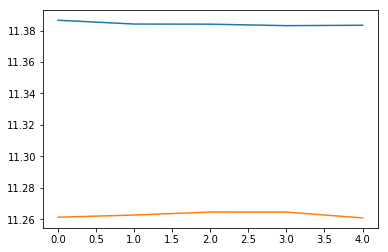

In [46]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

### Same stacked LSTM model, rendered "stateful"
- A stateful recurrent model is one for which the internal states (memories) obtained after processing a batch of samples are reused as initial states for the samples of the next batch. This allows to process longer sequences while keeping computational complexity manageable.
- Read more: https://keras.io/getting-started/faq/#how-can-i-use-stateful-rnns

In [47]:
data_dim = 16
timesteps = 8
num_classes = 10
batch_size = 32

# Expected input batch shape: (batch_size, timesteps, data_dim)
# Note that we have to provide the full batch_input_shape since the network is stateful.
# the sample of index i in batch k is the follow-up for the sample i in batch k-1.
model = Sequential()
model.add(LSTM(32, return_sequences=True, stateful=True,
               batch_input_shape=(batch_size, timesteps, data_dim)))
model.add(LSTM(32, return_sequences=True, stateful=True))
model.add(LSTM(32, stateful=True))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

print model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_42 (LSTM)               (32, 8, 32)               6272      
_________________________________________________________________
lstm_43 (LSTM)               (32, 8, 32)               8320      
_________________________________________________________________
lstm_44 (LSTM)               (32, 32)                  8320      
_________________________________________________________________
dense_12 (Dense)             (32, 10)                  330       
Total params: 23,242
Trainable params: 23,242
Non-trainable params: 0
_________________________________________________________________
None


In [48]:
# Generate dummy training data
x_train = np.random.random((batch_size * 10, timesteps, data_dim))
y_train = np.random.random((batch_size * 10, num_classes))

# Generate dummy validation data
x_val = np.random.random((batch_size * 3, timesteps, data_dim))
y_val = np.random.random((batch_size * 3, num_classes))



In [49]:
hist = model.fit(x_train, y_train,
          batch_size=batch_size, epochs=5, shuffle=False,
          validation_data=(x_val, y_val))

Train on 320 samples, validate on 96 samples
Epoch 1/5
320/320 [==============================] - 2s 5ms/step - loss: 11.6351 - acc: 0.1250 - val_loss: 11.4336 - val_acc: 0.0938
Epoch 2/5
320/320 [==============================] - 0s 323us/step - loss: 11.6312 - acc: 0.1344 - val_loss: 11.4341 - val_acc: 0.1354
Epoch 3/5
320/320 [==============================] - 0s 302us/step - loss: 11.6301 - acc: 0.1375 - val_loss: 11.4343 - val_acc: 0.1458
Epoch 4/5
320/320 [==============================] - 0s 304us/step - loss: 11.6292 - acc: 0.1406 - val_loss: 11.4346 - val_acc: 0.1354
Epoch 5/5
320/320 [==============================] - 0s 297us/step - loss: 11.6284 - acc: 0.1438 - val_loss: 11.4349 - val_acc: 0.1354


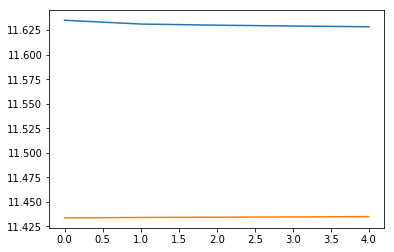

In [50]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

In [51]:
### Sequence classification with LSTM:
model = Sequential()
model.add(Embedding(max_features, output_dim=256))
model.add(LSTM(128))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=16, epochs=10)
score = model.evaluate(x_test, y_test, batch_size=16)

NameError: name 'max_features' is not defined